this a simple linear regression model for a randomly generated data with 1 feature for simplicity 

in this project we will create a 2d data then use it in a linear regression model 


# simple linear regression using numpy

In [9]:
import numpy as np
import matplotlib.pyplot as plt 

## generating random dataset

we will make a use of the multivariate function in numpy to be able to create a data we can fully control

the multivariate_normal function will do just that 

np.random.multivariate_normal(mean, covariance_matrix, size)

mean ----> This represents the center or location in N-dimensional space where samples are most likely to be generated.

covariance ----> This defines the "spread" and orientation of the distribution.

size ----> The number of samples to draw.

In [10]:
np.random.seed(69)

xx = np.array([-0.51, 51.2])                                                      # the start and the end of the data on the x axis

yy = np.array([0.33, 51.6])                                                       # the start and the end of the data on the y axis

means = [xx.mean(), yy.mean()]                                                    # center of the data in 2D

stds = [xx.std() / 3, yy.std() / 3]                                               # how spread the data is 

corr = .95                                                                        # the relationship between the x and y axis and how they change together

# covs = [
#   [Var(X) (width of the cloud)                            ,Cov(X,Y) (tilt of the cloud or direction of elongation)],
#   [Cov(Y,X) (tilt of the cloud or direction of elongation),                            Var(Y) (heigh of thr cloud)]
# ]
covs = [[stds[0]**2          , stds[0]*stds[1]*corr],                            
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

class1 = np.random.multivariate_normal(means, covs, 1000)

# rotation matrix to control the rotation of the data
theta = np.deg2rad(-30)
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])
df = class1 @ R.T

df += [0 , 0]                                                                    # controlling the location of the center of the data


x = df[:, 0]                                                                  
y = df[:, 1]

## blotting the generated data

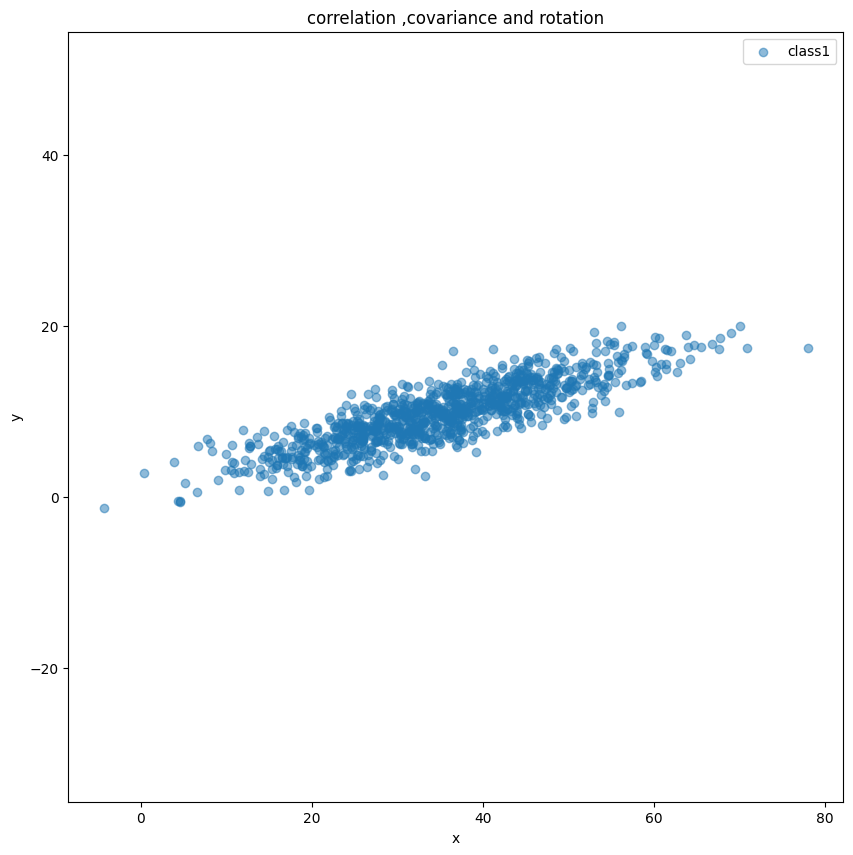

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(df[:,0], df[:,1],alpha=.5,label="class1")
plt.title("correlation ,covariance and rotation")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()

## linear model and loss minimizing

In [12]:
# first we create a class as we want the params to be kept as objects 
class LinearRegression:
    # setting up the hyper params and placeholders in the __init__ function
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.bias = None
        self.weight = None

    # making a fit function
    def fit(self, x, y):
        n_samples, n_features = x.shape
        # Initializing weights randomly
        self.weight = np.random.rand(n_features)
        self.bias = 0

        # gradient descent loop (each iteration = one gradient descent step)
        for i in range(self.n_iters):
            y_pred = np.dot(x, self.weight) + self.bias
            
            # 2. Gradient Calculation (MSE Derivatives)
            dw = (1 / n_samples) * np.dot(x.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # 3. Update Step (The "learning" part)
            self.weight = self.weight - self.lr * dw
            self.bias = self.bias - self.lr * db

    # prediction function
    def predict(self, X):
        return np.dot(X, self.weight) + self.bias

## predicting

In [13]:
X_matrix = x.reshape(-1, 1)

model = LinearRegression(.001 , 2000)
model.fit(X_matrix, y)
x_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

## blotting the regression line

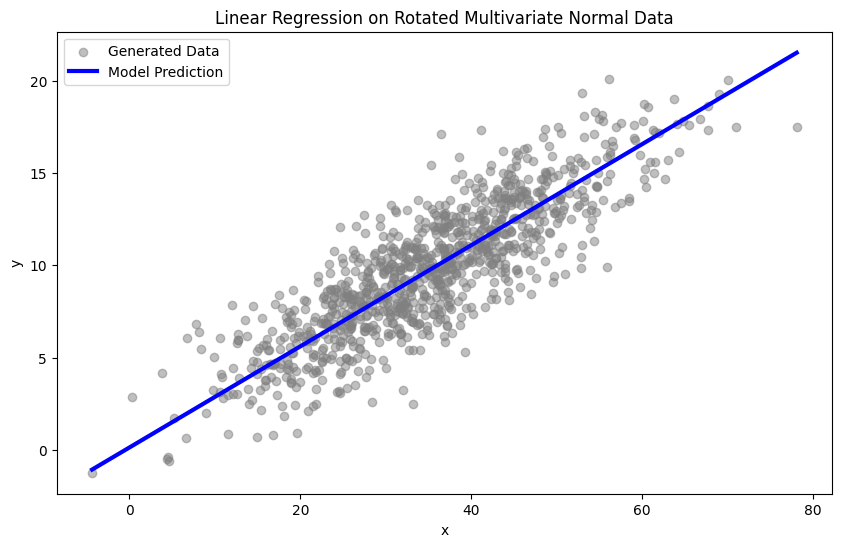

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Generated Data', color='gray')
plt.plot(x_line, y_line, color='blue', linewidth=3, label='Model Prediction')
plt.title("Linear Regression on Rotated Multivariate Normal Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()